In [1]:
# import pandas library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cars = pd.read_csv("final_cars.csv")

In [3]:
## create X and Y
y = cars['price']
X = cars.drop(columns=['price'])

In [4]:
X  = pd.get_dummies(X)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=99)

## RandomForestRegressor 

In [7]:
from sklearn.ensemble import RandomForestRegressor

In [8]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
print(f'Train score : {model.score(X_train,y_train)}')

Train score : 0.9853141040095724


In [9]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [11]:
import sklearn.metrics
y_pred = model.predict(X_test)
r2score = r2_score(y_test,y_pred)
print(f'Test Score  : {r2score:0.2f}')

Test Score  : 0.93


In [12]:
mse = mean_squared_error(y_test,y_pred)
print("MSE  : ",mse)
print("RMSE : ", np.sqrt(mse))

MSE  :  5767118.417091939
RMSE :  2401.482545656316


In [13]:
for f,v in zip (X_train.columns, model.feature_importances_):
      print(f"{f:30} {v:0.2f}")

length                         0.01
width                          0.02
curb-weight                    0.29
engine-size                    0.56
highway-mpg                    0.08
make_alfa-romero               0.00
make_audi                      0.00
make_bmw                       0.01
make_chevrolet                 0.00
make_dodge                     0.00
make_honda                     0.00
make_isuzu                     0.00
make_jaguar                    0.00
make_mazda                     0.00
make_mercedes-benz             0.00
make_mercury                   0.00
make_mitsubishi                0.00
make_nissan                    0.00
make_peugot                    0.00
make_plymouth                  0.00
make_porsche                   0.00
make_renault                   0.00
make_saab                      0.00
make_subaru                    0.00
make_toyota                    0.00
make_volkswagen                0.00
make_volvo                     0.00
fuel-type_diesel            

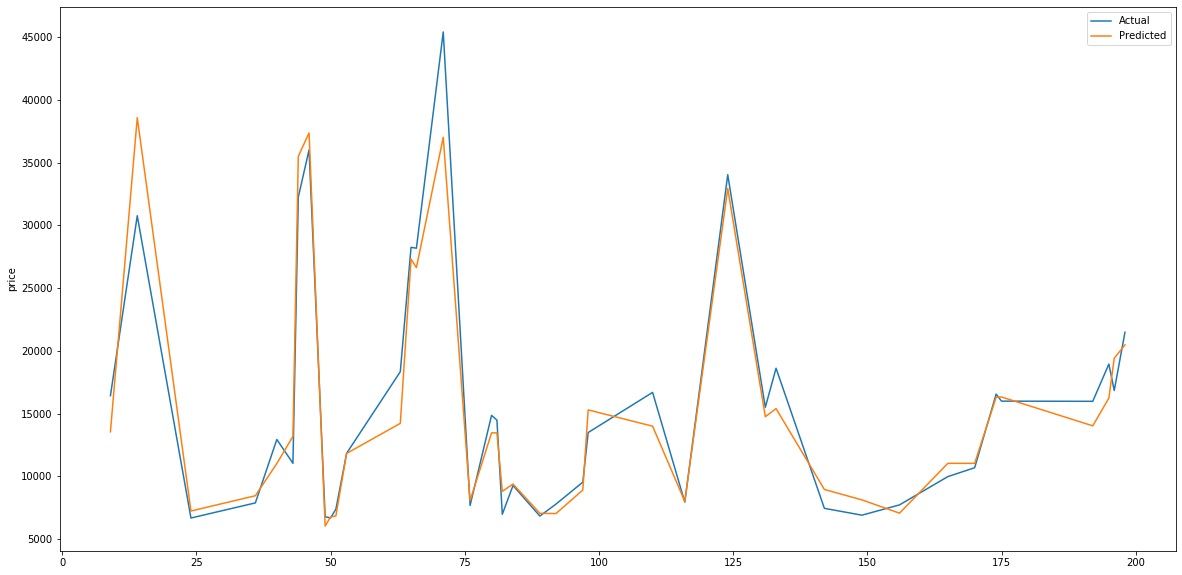

In [13]:
# Compare actual and predicted values
plt.gcf().set_size_inches(20,10)
sns.lineplot( y = y_test, x = X_test.index, label="Actual")
sns.lineplot( y = y_pred, x = X_test.index, label="Predicted")

### SGDRegressor

In [22]:
from sklearn.linear_model import SGDRegressor

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=99)

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [26]:
## use same scale for X_train and X_test
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
model = SGDRegressor(random_state=100)
model.fit(X_train, y_train)
print(f'Train score : {model.score(X_train,y_train):f}')

Train score : 0.929143


In [28]:
y_pred = model.predict(X_test)
r2score = r2_score(y_test,y_pred)
print(f'Test Score  : {r2score:0.2f}')

Test Score  : 0.93


In [29]:
mse = mean_squared_error(y_test,y_pred)
print("MSE  : ",mse)
print("RMSE : ", np.sqrt(mse))

MSE  :  6344789.0036292365
RMSE :  2518.8864610436963
